## 1、torch & numpy

In [1]:
import torch
import numpy as np

np_data = np.arange(6).reshape((2, 3))
torch_data = torch.from_numpy(np_data)
tensor2array = torch_data.numpy()
print(
    '\nnumpy array:', np_data,          # [[0 1 2], [3 4 5]]
    '\ntorch tensor:', torch_data,      #  0  1  2 \n 3  4  5    [torch.LongTensor of size 2x3]
    '\ntensor to array:', tensor2array, # [[0 1 2], [3 4 5]]
)


numpy array:[[0 1 2]
 [3 4 5]]
torch tensor:tensor([[0, 1, 2],
        [3, 4, 5]], dtype=torch.int32)
tensor to array:[[0 1 2]
 [3 4 5]]


In [2]:
data = [-1, -2, 1, 2]
tensor = torch.FloatTensor(data)  # 转换成32位浮点 tensor
print(
    '\nabs',
    '\nnumpy: ', np.abs(data),          # [1 2 1 2]
    '\ntorch: ', torch.abs(tensor)      # [1 2 1 2]
)

# sin   三角函数 sin
print(
    '\nsin',
    '\nnumpy: ', np.sin(data),      # [-0.84147098 -0.90929743  0.84147098  0.90929743]
    '\ntorch: ', torch.sin(tensor)  # [-0.8415 -0.9093  0.8415  0.9093]
)

# mean  均值
print(
    '\nmean',
    '\nnumpy: ', np.mean(data),         # 0.0
    '\ntorch: ', torch.mean(tensor)     # 0.0
)


abs
numpy:[1 2 1 2]
torch:tensor([1., 2., 1., 2.])

sin
numpy:[-0.84147098 -0.90929743  0.84147098  0.90929743]
torch:tensor([-0.8415, -0.9093,  0.8415,  0.9093])

mean
numpy:0.0
torch:tensor(0.)


## 2、Variable
* Variable计算时, 它在后面一步步默默地搭建着一个庞大的计算图(computational graph). 将所有的计算步骤(节点)都连接起来, 最后进行误差反向传递的时候, 一次性将所有variable里面的修改幅度(梯度)都计算出来, 而tensor没有这个能力.

In [3]:
import torch
from torch.autograd import Variable # torch 中 Variable 模块

# 先生鸡蛋
tensor = torch.FloatTensor([[1,2],[3,4]])
# 把鸡蛋放到篮子里, requires_grad是参不参与误差反向传播, 要不要计算梯度
variable = Variable(tensor, requires_grad=True)

print(tensor)
print(variable)

tensor([[1., 2.],
        [3., 4.]])
tensor([[1., 2.],
        [3., 4.]], requires_grad=True)


In [4]:
t_out = torch.mean(tensor*tensor)       # x^2
v_out = torch.mean(variable*variable)   # x^2
print(t_out)
print(v_out)

tensor(7.5000)
tensor(7.5000, grad_fn=<MeanBackward0>)


In [9]:
# v_out.backward()      # 模拟 v_out 的误差反向传递，只能运行一次
print(variable.grad)
print(variable)
print(variable.data)
print(variable.data.numpy())

tensor([[0.5000, 1.0000],
        [1.5000, 2.0000]])
tensor([[1., 2.],
        [3., 4.]], requires_grad=True)
tensor([[1., 2.],
        [3., 4.]])
[[1. 2.]
 [3. 4.]]


## 3、Activate Function

In [17]:
import torch  
from torch.autograd import Variable

x = torch.linspace(-5, 5, 200)  # x data (tensor), shape=(100, 1)
x = Variable(x)
x_np = x.data.numpy()   # 换成 numpy array, 出图时用

# 几种常用的 激励函数
y_relu = torch.relu(x).data.numpy()
y_sigmoid = torch.sigmoid(x).data.numpy()
y_tanh = torch.tanh(x).data.numpy()
# y_softmax = torch.softmax(x)  # softmax 比较特殊, 不能直接显示

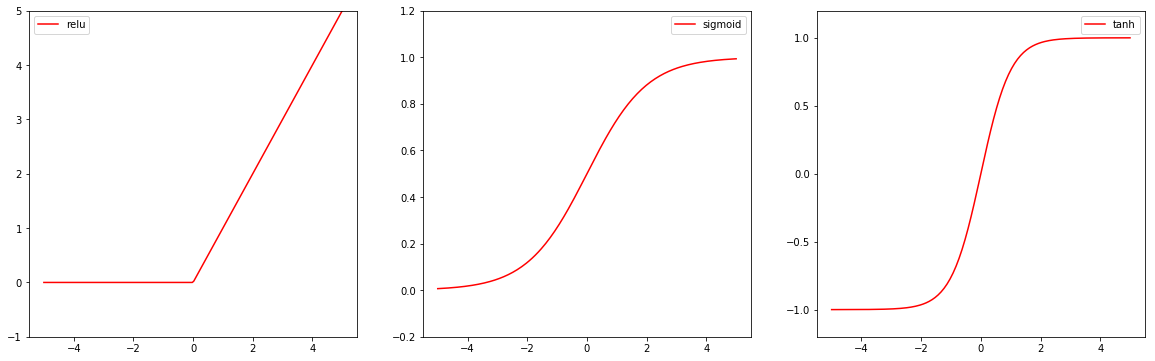

In [18]:
import matplotlib.pyplot as plt

plt.figure(1, figsize=(20, 6))
plt.subplot(131)
plt.plot(x_np, y_relu, c='red', label='relu')
plt.ylim((-1, 5))
plt.legend(loc='best')

plt.subplot(132)
plt.plot(x_np, y_sigmoid, c='red', label='sigmoid')
plt.ylim((-0.2, 1.2))
plt.legend(loc='best')

plt.subplot(133)
plt.plot(x_np, y_tanh, c='red', label='tanh')
plt.ylim((-1.2, 1.2))
plt.legend(loc='best')

plt.show()